# Tesla Stock Analysis

### Getting Data

In [43]:
import pandas as pd

tesla = pd.read_csv("TSLA Testing.csv")

print(tesla)

           Date        Open        High         Low       Close   Adj Close  \
0    2022-06-22  234.503326  246.833328  233.826660  236.086670  236.086670   
1    2022-06-23  237.906662  239.316666  228.636673  235.070007  235.070007   
2    2022-06-24  237.470001  246.066666  236.086670  245.706665  245.706665   
3    2022-06-27  249.366669  252.070007  242.566666  244.919998  244.919998   
4    2022-06-28  244.483337  249.970001  232.343338  232.663330  232.663330   
..          ...         ...         ...         ...         ...         ...   
246  2023-06-14  260.170013  261.570007  250.500000  256.790009  256.790009   
247  2023-06-15  248.399994  258.950012  247.289993  255.899994  255.899994   
248  2023-06-16  258.920013  263.600006  257.209991  260.540009  260.540009   
249  2023-06-20  261.500000  274.750000  261.119995  274.450012  274.450012   
250  2023-06-21  275.130005  276.989990  257.779999  259.459991  259.459991   

        Volume  
0    101107500  
1    104202600  


In [45]:
import matplotlib.pyplot as plt
import pandas as pd

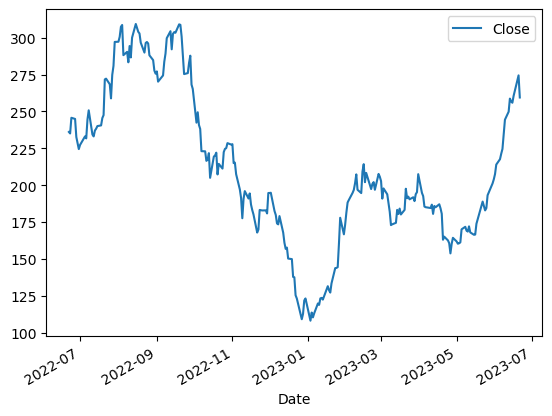

In [47]:
tesla['Date'] = pd.to_datetime(tesla['Date'])

tesla.plot(x='Date', y='Close')

plt.show()

### Simple buy at open and sell at close trading strategy

In [50]:
# dates in datetime
tesla["Date"] = pd.to_datetime(tesla["Date"])
tesla = tesla.sort_values('Date')

# Calculate daily price range (Profit/Loss)
tesla["PnL"] = tesla["Close"] - tesla["Open"]
tesla['Cumulative_PnL'] = tesla['PnL'].cumsum()

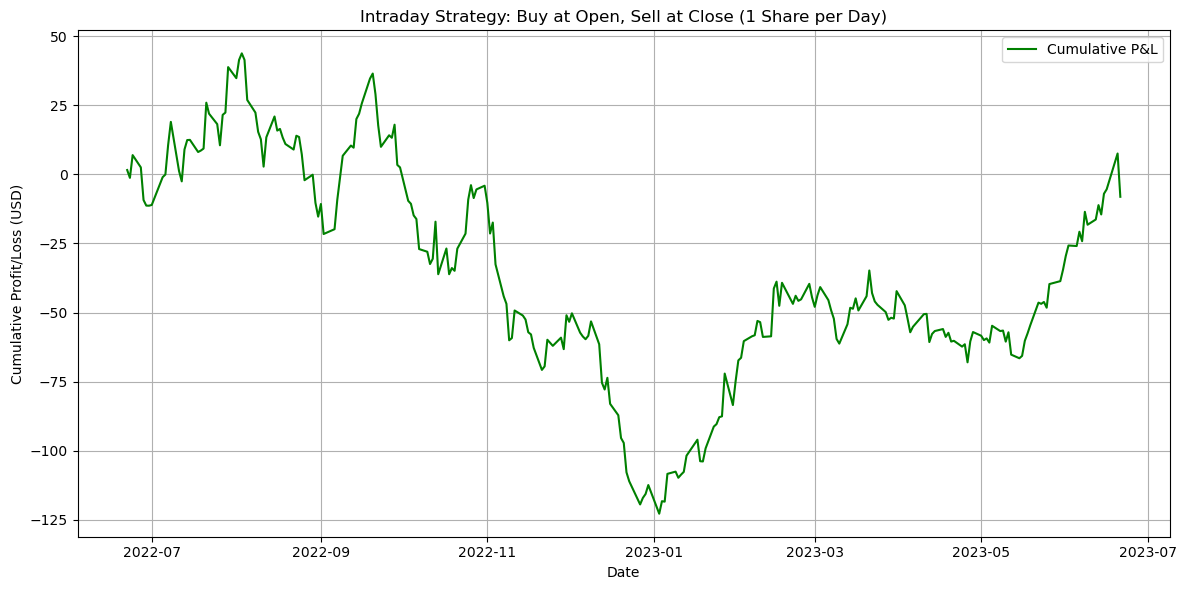

In [52]:
plt.figure(figsize=(12, 6))
plt.plot(tesla['Date'], tesla['Cumulative_PnL'], label='Cumulative P&L', color='green')
plt.title('Intraday Strategy: Buy at Open, Sell at Close (1 Share per Day)')
plt.xlabel('Date')
plt.ylabel('Cumulative Profit/Loss (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [54]:
print(f"Total Profit/Loss: ${tesla['PnL'].sum():.2f}")
print(f"Average Daily PnL: ${tesla['PnL'].mean():.2f}")
print(f"Winning Days: {(tesla['PnL'] > 0).sum()}")
print(f"Losing Days: {(tesla['PnL'] < 0).sum()}")
print(f"Max Daily Gain: ${tesla['PnL'].max():.2f}")
print(f"Max Daily Loss: ${tesla['PnL'].min():.2f}")

Total Profit/Loss: $-8.10
Average Daily PnL: $-0.03
Winning Days: 129
Losing Days: 122
Max Daily Gain: $17.31
Max Daily Loss: $-19.02


### Buy or sell when certain price deviation happens close at the end of the day. 

In [123]:
# Dates in datetime
tesla['Date'] = pd.to_datetime(tesla['Date'])
tesla = tesla.sort_values('Date')

# intrday return
tesla['ReturnPct'] = (tesla['Close'] - tesla['Open']) / tesla['Open'] * 100
threshold = 0.9 #percent
tesla["Position"] = 'None'
tesla['PnL'] = 0.0

for i, row in tesla.iterrows():
    if row['ReturnPct'] >= threshold:
        tesla.at[i, "Position"] = "Long"
        tesla.at[i, "PnL"] = row['Open'] - row['Close']
    elif row['ReturnPct'] <= -threshold:
        tesla.at[i, "Position"] = "Short"
        tesla.at[i, "PnL"] = row['Open'] - row['Close']

# Calculate cumulative profit
tesla['Cumulative_PnL'] = tesla['PnL'].cumsum()
        

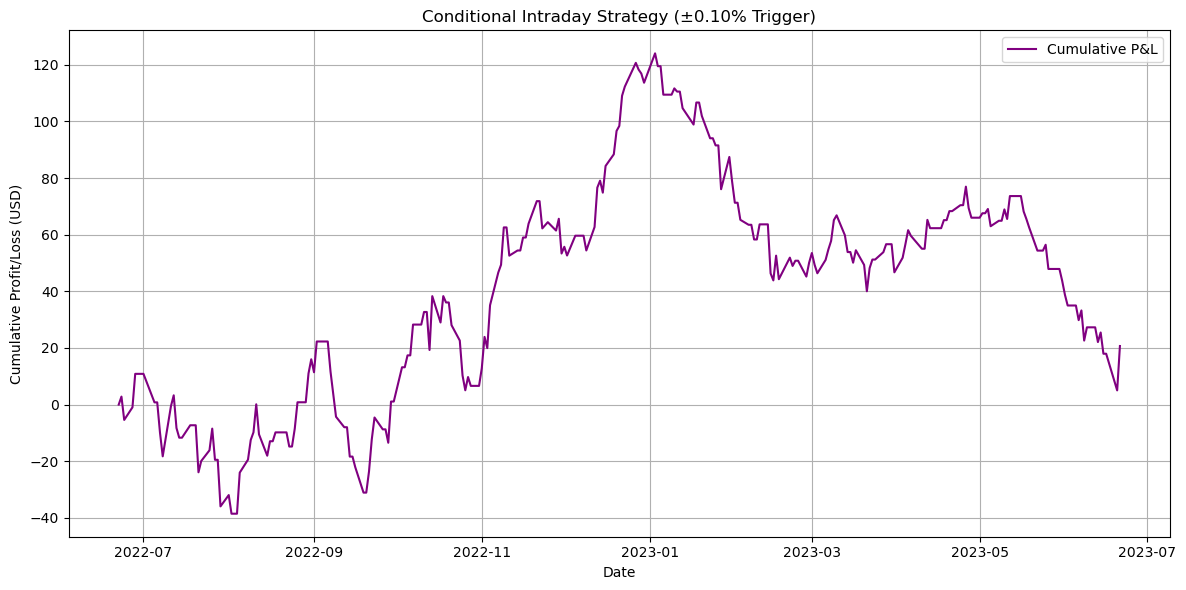

In [125]:
plt.figure(figsize=(12, 6))
plt.plot(tesla['Date'], tesla['Cumulative_PnL'], label='Cumulative P&L', color='purple')
plt.title('Conditional Intraday Strategy (±0.10% Trigger)')
plt.xlabel('Date')
plt.ylabel('Cumulative Profit/Loss (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [127]:
print(f"Total Profit/Loss: ${tesla['PnL'].sum():.2f}")
print(f"Average Trade PnL: ${tesla.loc[tesla['Position'] != 'None', 'PnL'].mean():.2f}")
print(f"Number of Trades: {(tesla['Position'] != 'None').sum()}")
print(f"Winning Trades: {(tesla['PnL'] > 0).sum()}")
print(f"Losing Trades: {(tesla['PnL'] < 0).sum()}")

Total Profit/Loss: $20.69
Average Trade PnL: $0.11
Number of Trades: 184
Winning Trades: 95
Losing Trades: 89
